# This section will pay more attention to some person-level data elements, focusing on Sex, Age, and Road user class separately.

## Import and clean data first

In [1]:
from numpy.random import randn
import numpy as np
import pandas as pd
np.random.seed(123)
import os
import re
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 10

import datetime

from numpy import nan as NA
%matplotlib inline

In [2]:
accident = pd.read_csv('C://Users/Patience Luo/Desktop/project/data/NCDB_1999_to_2014.csv', engine = 'python')

In [3]:
#replace all column head to lower case.

accident.columns = accident.columns.map(lambda x: x[:].lower())
accident

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
0,1999,01,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,01,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,01,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,UU,U,UU,2,UU,UU,01,U,U,...,13,07,UUUU,01,M,24,11,1,NN,1
5860401,2014,UU,U,23,2,01,06,05,1,1,...,01,14,2006,01,M,29,96,2,09,5
5860402,2014,UU,U,14,2,01,02,01,1,5,...,01,01,2006,01,F,UU,11,2,01,1
5860403,2014,UU,U,22,1,01,06,01,2,4,...,01,22,UUUU,01,M,67,12,3,01,U


In [4]:
#check the non-numberic values in date-time columns

accident[accident['c_mnth'].str.contains('[^0-9]')|
         accident['c_wday'].str.contains('[^0-9]')|
         accident['c_hour'].str.contains('[^0-9]')]

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
128,1999,01,1,UU,2,02,33,02,1,1,...,01,06,1990,01,M,57,11,1,02,1
129,1999,01,1,UU,2,02,33,02,1,1,...,02,01,1991,01,M,18,11,2,02,1
175,1999,01,1,UU,2,01,03,UU,1,4,...,01,01,1989,01,M,30,11,2,02,1
176,1999,01,1,UU,2,01,03,UU,1,4,...,01,01,1989,02,M,29,13,2,02,2
177,1999,01,1,UU,2,01,03,UU,1,4,...,01,01,1989,03,M,01,21,2,02,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,UU,U,UU,2,UU,UU,01,U,U,...,13,07,UUUU,01,M,24,11,1,NN,1
5860401,2014,UU,U,23,2,01,06,05,1,1,...,01,14,2006,01,M,29,96,2,09,5
5860402,2014,UU,U,14,2,01,02,01,1,5,...,01,01,2006,01,F,UU,11,2,01,1
5860403,2014,UU,U,22,1,01,06,01,2,4,...,01,22,UUUU,01,M,67,12,3,01,U


In [5]:
#remove all special values (unknown to us) in date-time columns, prepare for using date series as index.
#make a copy "df" for further analysis, avoid mess up the original data "accident".

df = accident[:]
df[['c_mnth','c_wday','c_hour']]=df[['c_mnth','c_wday','c_hour']].replace('[^0-9]+',np.nan,regex=True)

df.dropna(axis=0,subset=['c_mnth','c_wday','c_hour'],inplace=True)
df

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
0,1999,01,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,01,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,01,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860376,2014,12,7,14,2,02,41,01,1,5,...,02,05,2008,01,M,44,11,1,02,1
5860377,2014,12,7,14,2,02,41,01,1,5,...,02,05,2008,02,M,34,13,2,02,2
5860378,2014,12,7,19,2,01,03,01,1,3,...,01,01,2001,01,F,35,11,2,02,1
5860379,2014,12,7,19,2,01,03,01,1,3,...,01,01,2001,02,M,26,13,1,02,2


In [6]:
# generating working data set, dfa, by keeping the using elements
dfa=df.loc[:,['c_hour','c_vehs','c_wday','c_conf','p_sex','p_age','p_isev','p_user']]
dfa

,c_hour,c_vehs,c_wday,c_conf,p_sex,p_age,p_isev,p_user
0,20,02,1,34,M,41,1,1
1,20,02,1,34,M,19,1,1
2,20,02,1,34,F,20,2,2
3,08,01,1,01,M,46,1,1
4,08,01,1,01,M,05,2,3
...,...,...,...,...,...,...,...,...
5860376,14,02,7,41,M,44,1,1
5860377,14,02,7,41,M,34,2,2
5860378,19,01,7,03,F,35,2,1
5860379,19,01,7,03,M,26,1,2


In [7]:
# define 0 as men; 1 as women
dfa.p_sex.replace({'M':0,'F':1},inplace=True)
# Clean the missing variable by droping the row which contains any missing variables
dfa.replace('[^0-9]+',np.nan,regex=True,inplace=True)
dfa.dropna(inplace=True)

## Now, let's start to analysis
### Part 1. Analysis the following factors to person sex:
a) Collision hour

b) Medical treatment required

c) Collision configuration




### a) Collision hour

In [8]:
num=dfa.groupby(['p_sex']).count()
print(num)

        c_hour   c_vehs   c_wday   c_conf    p_age   p_isev   p_user
p_sex                                                               
0.0    2608529  2608529  2608529  2608529  2608529  2608529  2608529
1.0    2116502  2116502  2116502  2116502  2116502  2116502  2116502


In [9]:
df3 =dfa.loc[:,['p_sex','c_hour']].groupby(['p_sex','c_hour']).size(). unstack().T
df3

p_sex,0.0,1.0
c_hour,,
00,45496,24789
01,39313,19083
02,42667,18743
03,35165,15170
04,22423,9324
...,...,...
19,128684,100923
20,100078,75411
21,94452,70296


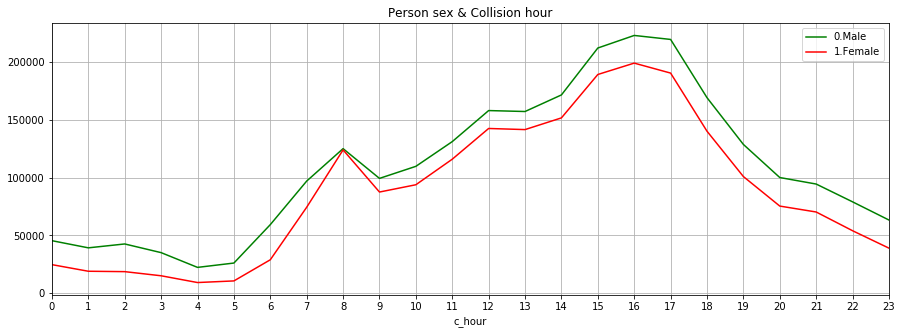

In [10]:
df3.plot(rot=0,color=['g','r'],figsize=(15,5),title='Person sex & Collision hour')
plt.legend(['0.Male','1.Female'])
plt.xticks(range(0,24),range(0,24))
plt.grid();

In [11]:
df3.iloc[8,]

p_sex
0.0    125047
1.0    123961
Name: 08, dtype: int64

Conclusion: Man is more likely to involve in a collision accident at all times. However, the collision times of male and female are very close to each other at 8 am, around 125047 and 123961.   

Also, for both male and female, the riskiest time period is from 3 pm to 5 pm, and then the risk has a monotonically decreasing trend.

### b) Medical treatment required

In [12]:
df2 =dfa.loc[:,['p_sex','p_isev']].groupby(['p_sex','p_isev']).size().unstack()
df2

p_isev,1,2,3
p_sex,,,
0.0,1275004,1308971,24554
1.0,733657,1371725,11120


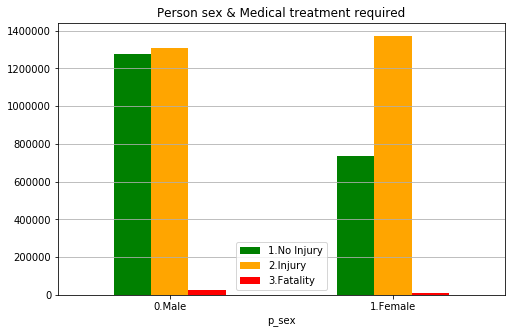

In [13]:
df2.plot(kind='bar',rot=0, color=['g','orange','r'], figsize=(8,5),title='Person sex & Medical treatment required')
plt.legend(['1.No Injury','2.Injury','3.Fatality'])
plt.xticks(range(0,2),['0.Male','1.Female'])
plt.grid(axis='y');


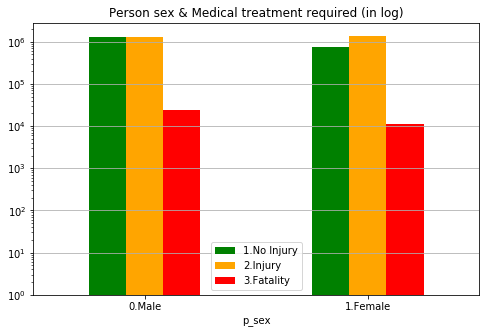

In [14]:
df2.plot(kind='bar',rot=0, color=['g','orange','r'], figsize=(8,5),log= True, title='Person sex & Medical treatment required (in log)')
plt.legend(['1.No Injury','2.Injury','3.Fatality'])
plt.xticks(range(0,2),['0.Male','1.Female'])
plt.grid(axis='y');

Conclusion: Female are more likely to injure in an accident, compared to male. However, men are twice as likely as women to die in an accident.

### c) Collision configuration

In [15]:
dfa.groupby(['p_sex','c_conf']).count()


c_hour  c_vehs  c_wday   p_age  p_isev  p_user
p_sex c_conf                                                
0.0   01       41645   41645   41645   41645   41645   41645
      02       81487   81487   81487   81487   81487   81487
      03       90563   90563   90563   90563   90563   90563
      04      115633  115633  115633  115633  115633  115633
      05        7097    7097    7097    7097    7097    7097
...              ...     ...     ...     ...     ...     ...
1.0   33      170663  170663  170663  170663  170663  170663
      34       23934   23934   23934   23934   23934   23934
      35      346762  346762  346762  346762  346762  346762
      36      183779  183779  183779  183779  183779  183779
      41       17613   17613   17613   17613   17613   17613

[36 rows x 6 columns]

In [16]:
df1 = dfa.loc[:,['p_sex','c_conf']].groupby(['p_sex','c_conf']).size().unstack().T
df1

p_sex,0.0,1.0
c_conf,,
01,41645,31311
02,81487,64589
03,90563,59520
04,115633,78210
05,7097,4253
...,...,...
33,198828,170663
34,30122,23934
35,407601,346762


In [17]:
x_lable=['01.SV Hit movible','02.SV Hit stationary','03.SV Ran off left shoulder',
         '04.SV Ran off right shoulder','05.SV Rollover on roadway',
         '06.SV Others','21.2V SD Rear','22.2V SD side-swipe',
         '23.2V SD Lf','24.2V SD Rt','25.2V Others','31.2V DD Head',
         '32.2V DD side-swipe','33.2V DD Lf','34.2V DD Rt','35.2V DD Right angle',
         '36.2V DD other','41.Hit parked vehicle']
len(x_lable)

18

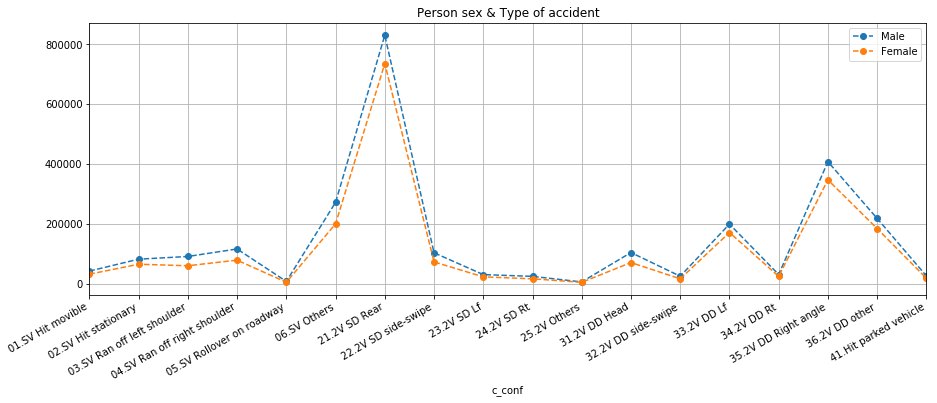

In [18]:
df1.plot(style = 'o--', figsize = (15,5),title='Person sex & Type of accident')

plt.legend(['Male','Female'])
plt.xticks(range(0,18),x_lable,rotation=30,ha='right');
plt.grid();

Conclusion: for all kinds of collision configurations, the male has higher collision risk. The rear-end collision is the most frequent type of the traffic accidents for both man and woman. Also, the second main type is right-angle side collision. Additionally, Rollover on a roadway is the least common type of accident.

## Part 2. Analysis the following factors to person age:
a) Collision hour

b) Day of week

c) Medical treatment required

### a) Collision hour

In [19]:
df4 =dfa.loc[:,['p_age','c_hour']].astype(int).groupby(['p_age','c_hour']).size().unstack()
df4.fillna(0, inplace=True)

In [20]:
bins = list(range(0,101,10))

In [21]:
df4['age'] = pd.cut(df4.index,bins,labels=bins[:-1])
df5 = df4.groupby('age').sum()
df5 = df5.T
df5

age,0,10,20,30,40,50,60,70,80,90
c_hour,,,,,,,,,,
0,1217.0,20387.0,21615.0,11212.0,8613.0,4736.0,1711.0,625.0,157.0,12.0
1,763.0,17252.0,19608.0,9088.0,6413.0,3438.0,1281.0,443.0,102.0,8.0
2,545.0,17969.0,23646.0,9245.0,5679.0,2857.0,1018.0,342.0,100.0,9.0
3,420.0,14557.0,20071.0,7269.0,4551.0,2311.0,797.0,265.0,85.0,9.0
4,437.0,8124.0,10970.0,5206.0,3732.0,2109.0,800.0,291.0,73.0,5.0
...,...,...,...,...,...,...,...,...,...,...
19,13661.0,46805.0,52283.0,38118.0,35465.0,23433.0,11549.0,6153.0,1987.0,153.0
20,9253.0,40412.0,41493.0,28268.0,25882.0,16824.0,8111.0,3959.0,1200.0,87.0
21,6302.0,42388.0,40481.0,25686.0,23317.0,14988.0,7099.0,3445.0,959.0,83.0


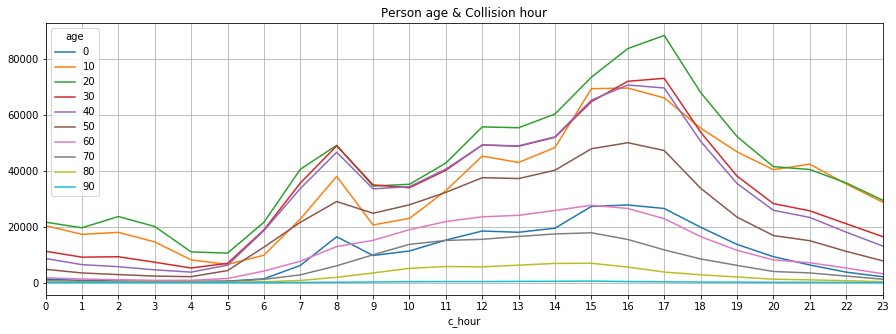

In [22]:
df5.plot(rot=0,figsize=(15,5), title='Person age & Collision hour')
#plt.legend(['0.Male','1.Female'])
plt.xticks(range(0,24),range(0,24))
plt.grid();

Conlcusion: the most dangerous population is from 21 to 30 years old. Also, the youth whose age is from 11 to 20 are more likely to involve in a collision at night, especially from 9 pm to 1 am. At morning (8 am to 11 am), three age-groups (21 to 30; 31 to 40; 41 to 50) has the similar number of accident. In the end, the graph shows the working people share the same pattern, which is the rush hour is likely to collide.  

### b) Day of week


In [23]:
df6 =dfa.loc[:,['p_age','c_wday']].astype(int).groupby(['c_wday','p_age']).size().unstack().T
df6

c_wday,1,2,3,4,5,6,7
p_age,,,,,,,
1,4713,4936,5049,5159,6147,5712,4861
2,3052,3103,3156,3332,3853,3836,3129
3,3055,3237,3204,3270,3833,3826,3221
4,3152,3246,3232,3325,4014,4101,3303
5,3120,3224,3023,3338,4028,4301,3481
...,...,...,...,...,...,...,...
95,27,33,40,32,45,31,26
96,25,29,23,24,33,19,16
97,13,19,11,16,12,17,10


In [24]:
bins = list(range(0,101,10))

In [25]:
df6['age'] = pd.cut(df6.index,bins,labels=bins[:-1])
df7 = df6.groupby('age').sum()
df7 = df7.T
df7

age,0,10,20,30,40,50,60,70,80,90
c_wday,,,,,,,,,,
1,32375,102785,131201,109193,104862,74305,39475,23260,8091,526
2,32874,104719,136343,115386,111810,78813,43216,25414,9196,581
3,32814,105537,137327,116985,112477,79492,43020,25553,9108,597
4,34653,114066,145554,121937,117384,82652,44969,26813,9524,620
5,42190,143611,172535,137507,130276,91212,48919,28533,9872,652
6,44406,137920,159724,113640,104912,72032,38817,22539,7873,540
7,36962,113985,132344,90299,83311,57634,31186,18735,6883,475


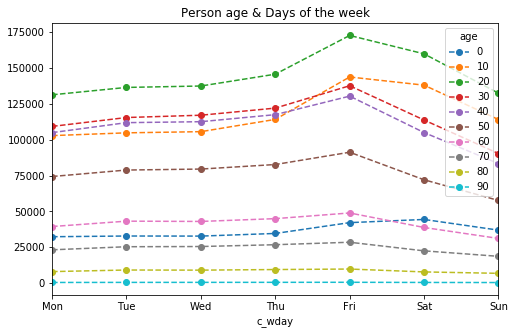

In [26]:
df7.plot(rot=0,figsize=(8,5),title='Person age & Days of the week',style='o--')
plt.xticks(range(1,8),['Mon','Tue','Wed','Thu','Fri','Sat','Sun']);
# plt.grid(axis='y');

Conlusion: During the whole week, young adults (from 21 to 31) are risky population.The risk decrease with age increases, for example, the age from 41 to 50 are less likely to involve in an accident, compared with whose age is from 31 to 40. Also, the collision probabilities of the youth significantly increased over the weekend.

### c) Medical Treatment Required

In [27]:
df8 =dfa.loc[:,['p_age','p_isev']].astype(int).groupby(['p_age','p_isev']).size().unstack()
df8.fillna(0, inplace=True)
df8

p_isev,1,2,3
p_age,,,
1,25964,10486,127
2,16527,6870,64
3,15825,7763,58
4,15383,8925,65
5,14706,9738,71
...,...,...,...
95,86,136,12
96,48,111,10
97,30,65,3


In [28]:
bins = list(range(0,101,10))

In [29]:
df8['age'] = pd.cut(df8.index,bins,labels=bins[:-1])
df9 = df8.groupby('age').sum()
df9 

p_isev,1,2,3
age,,,
0,152003,103456,815
10,339240,477657,5726
20,411785,596179,7064
30,342096,458073,4778
40,325135,434821,5076
50,223739,308020,4381
60,121984,164588,3030
70,68856,99135,2856
80,22480,36303,1764


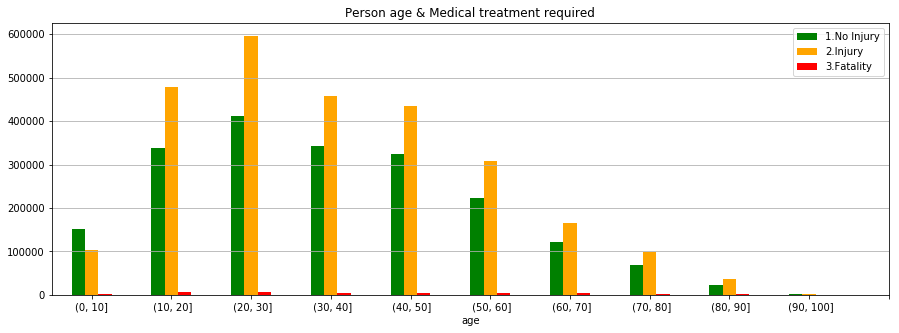

In [30]:
df9.plot(kind='bar',rot=0, color=['g','orange','r'],figsize=(15,5),title='Person age & Medical treatment required')
plt.legend(['1.No Injury','2.Injury','3.Fatality'])
plt.xticks(range(0,11),['(0, 10]',' (10, 20]',' (20, 30]',' (30, 40]',' (40, 50]',' (50, 60]',' (60, 70]',' (70, 80]',' (80, 90]',' (90, 100]'])
plt.grid(axis='y');


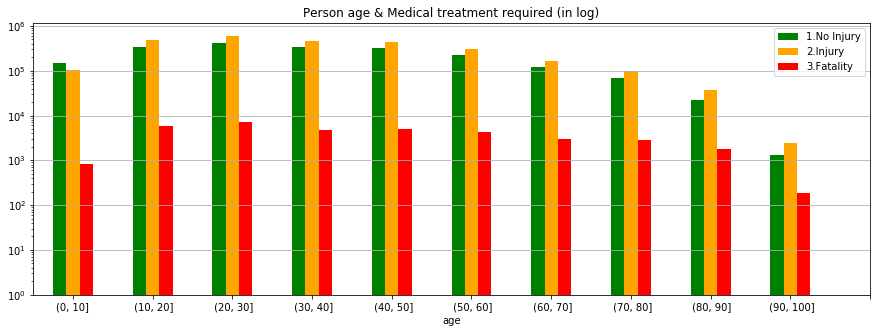

In [31]:
df9.plot( kind='bar',rot=0, color=['g','orange','r'],figsize=(15,5),log= True, title='Person age & Medical treatment required (in log)')
plt.legend(['1.No Injury','2.Injury','3.Fatality'])
plt.xticks(range(0,11),['(0, 10]',' (10, 20]',' (20, 30]',' (30, 40]',' (40, 50]',' (50, 60]',' (60, 70]',' (70, 80]',' (80, 90]',' (90, 100]'])
plt.grid(axis='y');


In [32]:
dfa[(dfa.p_age.astype(int)> 20) & (dfa.p_age.astype(int)<= 30)].p_isev.value_counts()

2    596179
1    411785
3      7064
Name: p_isev, dtype: int64

In [33]:
dfa[(dfa.p_age.astype(int)> 50) & (dfa.p_age.astype(int)<= 60)].p_isev.value_counts()

2    308020
1    223739
3      4381
Name: p_isev, dtype: int64

Conlusion: Except for whose age below 10, other age groups show the similar conclusion that people are more likely to injure in a collision. Same as before, the graph shows the youth are the most dangerous group because they have the highest probability to involve in a collision regardless of the severity (not injure, injure or die).

## Part 3. Analysis the following factors to Road user class 
a) Medical treatment required

b) Collision configuration

### a) Medical treatment required

In [34]:
df11 =dfa.loc[:,['p_user','p_isev']].astype(int).groupby(['p_user','p_isev']).size().unstack()
df11.fillna(0, inplace=True)
#df11 = df11.T
df11

p_isev,1,2,3
p_user,,,
1,1386909,1612318,19119
2,606762,746529,8422
3,3801,167333,4645
4,2616,65644,690
5,8573,88872,2798


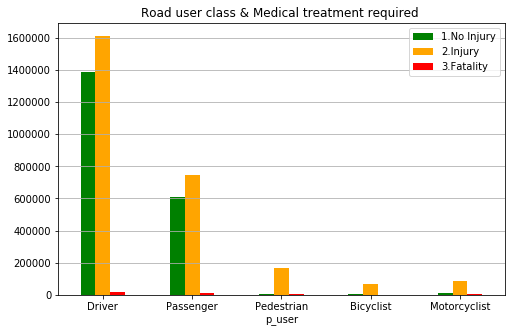

In [35]:
df11.plot(kind='bar',rot=0,color=['g','orange','r'],figsize=(8,5),title='Road user class & Medical treatment required ')
plt.legend(['1.No Injury','2.Injury','3.Fatality'])
plt.xticks(range(0,5),['Driver','Passenger','Pedestrian','Bicyclist', 'Motorcyclist'])
plt.grid(axis='y');

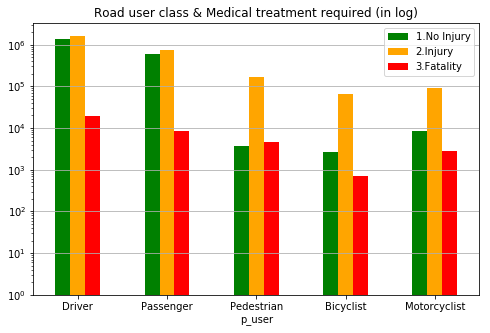

In [36]:
df11.plot(kind='bar',rot=0,color=['g','orange','r'],figsize=(8,5), log = True, title='Road user class & Medical treatment required (in log)')
plt.legend(['1.No Injury','2.Injury','3.Fatality'])
plt.xticks(range(0,5),['Driver','Passenger','Pedestrian','Bicyclist', 'Motorcyclist'])
plt.grid(axis='y');

In [37]:
df10 =dfa.loc[:,['p_age','c_vehs']].astype(int).groupby(['p_age','c_vehs']).size().unstack()
#df10.fillna(0, inplace=True)
#df10.T.dropna(how='all',inplace=True)
#df10.sum().sort_values()

Conclusion: Drivers are twice likely to get hurt or die than passengers. Among all 5 categories, bicyclists are the safest. 

### b) Collision configuration

In [38]:
df12 = dfa.loc[:,['p_user','c_conf']].groupby(['p_user','c_conf']).size().unstack().T
df12.fillna(0,inplace=True)

In [39]:
x_lable=['01.SV Hit movible','02.SV Hit stationary','03.SV Ran off left shoulder',
         '04.SV Ran off right shoulder','05.SV Rollover on roadway',
         '06.SV Others','21.2V SD Rear','22.2V SD side-swipe',
         '23.2V SD Lf','24.2V SD Rt','25.2V Others','31.2V DD Head',
         '32.2V DD side-swipe','33.2V DD Lf','34.2V DD Rt','35.2V DD Right angle',
         '36.2V DD other','41.Hit parked vehicle']
len(x_lable)

18

In [40]:
df12

p_user,1,2,3,4,5
c_conf,,,,,
01,35686,14033,21714,118,1405
02,69756,25725,46754,164,3677
03,92565,50989,410,67,6052
04,118168,63293,544,112,11726
05,6034,3067,35,12,2202
...,...,...,...,...,...
33,239914,107795,4197,7710,9875
34,33846,14502,1277,3507,924
35,491284,217906,5609,29961,9603


In [41]:
df12.iloc[4,3]

12

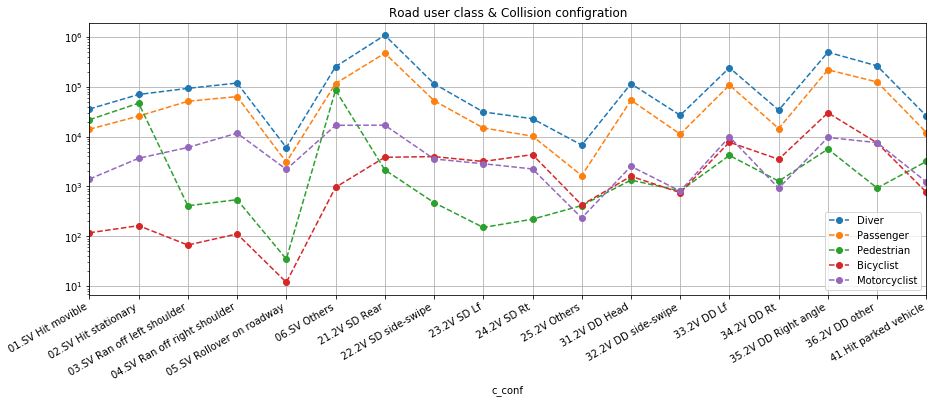

In [42]:
df12.plot(style = 'o--', logy = True, figsize = (15,5),title='Road user class & Collision configration' )
plt.legend(['Diver','Passenger','Pedestrian','Bicyclist', 'Motorcyclist'])
plt.xticks(range(0,18),x_lable,rotation=30,ha='right')
plt.grid()

Conclusion: It is no surprise that driver and passenger have an identical pattern, both of them are more likely to involve in a rear-end collision, and the second common type is a right-angle collision. It is infrequent that a single vehicle rollover on a roadway, causing pedestrian or bicyclists to injure or die. However, for pedestrian, they are more likely to involve in any other single vehicle collision type; for bicyclists, they are more likely to get hurt in a right-angle collision. Among all types of accidents, Motorcyclists get a middling ranking. 